# Section 3.2: Linear regression, part 2

Thus far in this track, we have examined building and fitting machine-learning (ML) models “locally.” True, the notebooks have been located in the cloud themselves, but the models with all of their predictive and classification power are stuck in those notebooks. To use these models, you would have to load data into your notebooks and get the results there.

In practice, we want those models to be accessible from a number of locations. And while the management of production ML models has a lifecycle all its own, one part of that is making models accessible from the web. One way to do so is to develop them by using third-party cloud tools, such as [Microsoft Azure ML Studio](https://studio.azureml.net) (not to be confused with Microsoft Azure Machine Learning Service, which provides end-to-end lifecycle management for ML models).

Alternatively, we can develop and deploy a function that can be accessed by other programs over the web—a web service—that runs within Azure ML Studio. Cloud-based ML-development tools like Azure ML Studio streamline the building, training, and deployment of machine-learning models by providing a drag-and-drop interface and making a wide array of ML algorithms and tools readily available. Crucially, such tools simplify the deployment and management of ML models in production (not a focus of this course, but a major consideration in the real world). Let's revisit our simple linear model from the last session, this time in Azure ML Studio.

> **Learning goal:** By the end of this section, you should be comfortable building ML models in Azure ML Studio and publishing them as web services.

## Save dataset locally

We can't access our dataset in Azure Notebooks directly from Azure ML Studio, so before we can use it, we will save it locally in order to upload it to Azure ML Studio.

1. 1.	Go to the browser tab with the Azure Notebooks project for this course. Click the **Data** folder.

2. Click the option button next to **UN11.csv**.

3. At the top of the project page, click **Download**.

    <img align="center" style="padding-right:10px;" src="Images/001.png" border="5">

4. Save UN11.csv to a location on your computer that you can easily remember for later access.

## Upload dataset

Now we will go to Azure ML Studio and upload the UN11 dataset we used in Section 3.1.

1. Open [Azure ML Studio](https://studio.azureml.net) in a new browser tab and sign in with Microsoft credentials. Azure ML Studio is free and does not require an Azure subscription. Once signed in to your Microsoft account (with the same credentials you’ve used for Azure Notebooks), you're in your “workspace.”

2. In the left pane, click **DATASETS** (the database drum-cluster icon).

3. In the lower-right part of the screen, click **NEW** (the plus sign icon).

   <img align="center" style="padding-right:10px;" src="Images/005.png" border="5">

4. In the **NEW** window, next to **DATASET**, click **FROM LOCAL FILE**.

   <img align="center" style="padding-right:10px;" src="Images/010.png" border="5">

5. In the **Upload a new dataset** window, in the **SELECT THE DATA TO UPLOAD** field, click **Browse**. 
   - Navigate to the location where you saved the UN11.csv file you downloaded from Azure Notebooks.
   - Select the file and click **Open**. 
   - Leave the default entries autofilled in the **Upload a new dataset** window and click **OK** (the check mark icon in the lower-right part of the screen).
   

## Create a simple linear regression model

1. In the left pane, click **Experiments** (the Erlenmeyer flask icon).

2. In the lower-right part of the screen, click **New** (the plus sign icon).

3. Under **Microsoft Samples**, click **Blank Experiment**.

   <img align="center" style="padding-right:10px;" src="Images/025.png" border="5">

4. At the top of the new experiment canvas, click in the name field (which reads “Experiment created on [Date]”) and rename the experiment to something descriptive (such as "Simple Linear Regression").

5. In the left panel, under **Saved Datasets > My Datasets**, click **UN11.csv** and drag it onto the canvas.

   <img align="center" style="padding-right:10px;" src="Images/030.png" border="5">
   > <font color=red>**Technical note:**</font> You can type the name of any of the modules mentioned in these instructions into the Search experiment items field at the top of the left pane to simplify searching for them.

6. In the left panel, under **Data Transformation > Manipulation**, click **Select Columns in Dataset** and drag it onto the canvas under the **UN11.csv** module.

7. Connect the **UN11.csv** module to **Select Columns in Dataset**.

    <img align="center" style="padding-right:10px;" src="Images/035.png" border="5">

8. Click the **Select Columns in Dataset** module if it is not selected. We will use it to select the columns from the dataset to use in the model.
    - In the **Properties** panel on the right, click the **Launch column selector** button.
    - In the **Select columns** window, click the field next to the **AVAILABLE COLUMNS** pane and select **`lifeExpF`** and **`ppgdp`** and move them to the **SELECTED COLUMNS** pane. Click the check-mark icon.

    <img align="center" style="padding-right:10px;" src="Images/040.png" border="5">

9. In the left panel, under **Machine Learning > Initialize Model > Regression**, click **Linear Regression** and drag it onto the canvas next to the **Select Columns in Dataset** module.

10. Click the **Linear Regression** module. In the **Properties** pane on the right, in the **Random number seed** field enter **`42`**; leave all other default values as they are.

    <img align="center" style="padding-right:10px;" src="Images/045.png" border="5">

11. In the left pane, under **Machine Learning > Train**, click **Train Model** and drag it onto the canvas under both the **Linear Regression** and **Select Columns in Dataset** modules.

12. Connect **Linear Regression** to the upper-left part of the **Train Model** module, and then connect **Select Columns in Dataset** to the upper-right part of it.

13. Click on the **Train Model** module so that .we will tell the model which column from the dataset should serve as response in the model.
    - In the **Properties** panel on the right, click the **Launch column selector** button.
    - In the **Select a single column** window, click the **Press enter to enter column name** field, and then select  **`lifeExpF`** and click the check-mark icon.
    
    <img align="center" style="padding-right:10px;" src="Images/050.png" border="5">
    
14. In the left panel, under **Machine Learning > Score**, click **Score Model** and drag it onto the canvas under both the **Train Model** and **Select Columns in Dataset** modules.

15. Connect **Train Model** to the upper-left part of the **Score Model** module, and then connect **Select Columns in Dataset** to the upper-right part of it. Leave the default **Properties** setting for the module.

16. In the left pane, under **Machine Learning > Evaluate**, click **Evaluate Model** and drag it onto the canvas under the **Score Model** module.

17. 17.	Connect **Score Model** to the upper-left receptor of the **Evaluate Model** module.

    <img align="center" style="padding-right:10px;" src="Images/055.png" border="5">

18. At the bottom of the window, click **Run**.

    <img align="center" style="padding-right:10px;" src="Images/060.png" border="5">
    
19. After all of the modules have run, right-click the circle in the center at the bottom of the **Evaluate Model** module, and then select **Visualize**.

    <img align="center" style="padding-right:10px;" src="Images/065.png" border="5">

With an $R^2$ score (referred to in Azure ML Studio as the *Coefficient of Determination*) of 0.30, we got the score that we would expect (identical to what we got in Section 3.1).

## Manipulate the dataset

Let's do what we did in Section 3.1 and transform `ppgdp` to account for the logarithmic relationship between per-capita GDP and female life expectancy.

> **Technical note:** Now that you’re familiar with the Azure ML Studio interface, procedures that follow in this section will only be as detailed as they were above when we encounter new functionality and aspects of the interface.

1. From **Statistical Functions** in the left panel, add **Apply Math Operation** between the **UN11.csv** and **Select Columns in Dataset** modules.

2. Delete the connector between **UN11.csv** and **Select Columns in Dataset** and instead form the connections to run **UN11.csv -> Apply Math Operation -> Select Columns in Dataset**.

3. Click the **Apply Math Operation** module.
   - In the **Properties** panel on the right, from the **Category** drop-down menu, select **Basic**.
   - In the **Basic math function** drop-down menu, select **Log10**.
   - Click the **Launch column selector** button.
   - In the **Select columns** window, click the drop-down menu that reads **column type** and then select **column name**. In the field that appear beside that drop-down menu, enter or select **`ppgdp`** and click the check-mark icon.
   - In the **Output mode** drop-down menu, select **Append**.
   
4. Right-click the **Apply Math Operation** module and select **Run selected**.

   <img align="center" style="padding-right:10px;" src="Images/075.png" border="5">
   
5. Click the **Select Columns in Dataset** module and then replace **`ppgdp`** with **`Log10(ppgdp)`** as one of the selected columns.

6. After all of the modules have run, right-click the circle at the center-bottom of the **Evaluate Model** module, and then select **Visualize**.

Our new model now has an $R^2$ score of 0.60, which is exactly what we expected.

## Multiple regression revisited

We saw in Section 3.1 that we could extract more complex relationships in the data by including more predictors in our model. This is extremely easy to do in Azure ML Studio: all we have to do is include more columns in our model.

> **Exercise**
>
> Go back into your experiment and alter it to include the `pctUrban` column. (**Hint:** Use the **Launch column selector** on the **Select Columns in Dataset** module. Be sure to include `Log10(ppgdp)` and `lifeExpF` in addition to `pctUrban`.)

> **Question**
>
> What was your $R^2$ score for the enhanced model? Is it what you were expecting?

Of course, as easy as it is to add columns, we should see what happens when we include all of the columns.

1. Click the **Select Columns in Dataset** module and then the **Launch column selector** button.

2. In the **Select columns** window in the **AVAILABLE COLUMNS** pane, select **region**, **group**, and **fertility**, move them to the **SELECTED COLUMNS** pane, and click the check-mark button.

    <img align="center" style="padding-right:10px;" src="Images/085.png" border="5">

3. Run the experiment again and check the new $R^2$ score.

Clearly 0.81 is a much better $R^2$ score, which serves to demonstrate that there is a lot of information supplied by the other features. But how is Azure ML Studio handling the categorical features?

## Categorical features

To see this, right-click in the center at the bottom of the **Train Model** module, and then select **Visualize**.

In the **Batch Linear Regressor** window, scroll down. What Azure ML Studio refers to as "weights" are what we referred to in Section 3.2 as "coefficients." The bias term is the intercept, and all of the other weights are the slopes. But what does "slope" even mean in the context of categorical features?

<img align="center" style="padding-right:10px;" src="Images/087.png" border="5">

Azure ML Studio uses a technique called [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) in which categorical features are assigned a state of `1` or `0` based on whether or not they are true or not. Thus an Organisation for Economic Co-operation and Developmen (OECD) member country would have a value of `1` for the `oecd` value in `group` and `0`s for `africa` and `other`.

Another term for this is *dummy variables*, and it might help to see it in action in Python here in the notebook. First, we'll need to import pandas and our dataset.

In [5]:
import pandas as pd
df = pd.read_csv('Data/UN11.csv')

In [6]:
df.head()

,region,group,fertility,ppgdp,lifeExpF,pctUrban
0,Asia,other,5.968,499.0,49.49,23
1,Europe,other,1.525,3677.2,80.40,53
2,Africa,africa,2.142,4473.0,75.00,67
3,Africa,africa,5.135,4321.9,53.17,59
4,Caribbean,other,2.000,13750.1,81.10,100


Pandas has a function that automatically creates dummy variable for us, `get_dummies()`. Here is it in use on the `group` feature of our dataset.

In [7]:
df = pd.get_dummies(data=df, columns=['group'])
df.head()

,region,fertility,ppgdp,lifeExpF,pctUrban,group_africa,group_oecd,group_other
0,Asia,5.968,499.0,49.49,23,0,0,1
1,Europe,1.525,3677.2,80.40,53,0,0,1
2,Africa,2.142,4473.0,75.00,67,1,0,0
3,Africa,5.135,4321.9,53.17,59,1,0,0
4,Caribbean,2.000,13750.1,81.10,100,0,0,1


We no longer have a single `group` column, but rather columns for `group_africa`, `group_oecd`, and `group_other`.

> **Exercise**
>
> Now use the `get_dummies()` function to create dummy variables for the `region` column and display the first five entries of the updated `DataFrame`.

> **Exercise solution**

In [8]:
df = pd.get_dummies(data=df, columns=['region'])
df.head()

,fertility,ppgdp,lifeExpF,pctUrban,group_africa,group_oecd,group_other,region_Africa,region_Asia,region_Caribbean,region_Europe,region_Latin Amer,region_North America,region_NorthAtlantic,region_Oceania
0,5.968,499.0,49.49,23,0,0,1,0,1,0,0,0,0,0,0
1,1.525,3677.2,80.40,53,0,0,1,0,0,0,1,0,0,0,0
2,2.142,4473.0,75.00,67,1,0,0,1,0,0,0,0,0,0,0
3,5.135,4321.9,53.17,59,1,0,0,1,0,0,0,0,0,0,0
4,2.000,13750.1,81.10,100,0,0,1,0,0,1,0,0,0,0,0


> **Technical note:** Note that each category within a categorical feature requires its own column for the dummy variables, each of which in turn constitutes its own new feature. If you have data with many categories in it, this can greatly increase the number of features you must deal with. For example, we just turned our dataset from one with six features into one with 15 features. Remember that as the number of features increases, so does the amount of data needed to adequately model it. The curse of dimensionality strikes again!

Back to the model in Azure ML Studio. When it comes time to make predictions based on the model, all features get multiplied by their respective coefficients. The continuous numeric features (`fertility`, `ppgdp`, `lifeExpF`, and `pctUrban`) have their values multiplied by their weights, and the dummy variables have their `1` or `0` value multiplied by their weights.

## Splitting data

So far in this section and Section 3.1, we have been committing a fairly serious data-science sin in the name of instructional clarity: we have not been splitting our data into test and training sets. This made sense while we were exploring the mechanics of linear regression, but now it's time to start handling our data correctly.

1. On the experiment canvas in Azure ML Studio, delete the connections between **Select Columns in Dataset** and the **Train Model** and **Score Model** modules.

2. From the left pane, under **Data Transformation > Sample and Split**, drag **Split Data** under the **Select Columns in Dataset** module.

3. In the **Properties** pane for the **Split Data** module, enter `0.7` for **Fraction of rows in the first output dataset**, and enter `42` for **Random seed**. Leave the default values for all other settings.

4. Connect **Select Columns in Dataset** to the top of the **Split Data** module, connect the lower-left circle in the **Split Data** module to the upper-right receptor in the **Train Model** module, and connect the lower-right circle to the upper-right receptor in the **Score Model** module.

 <img align="center" style="padding-right:10px;" src="Images/090.png" border="5">

 > **Technical note:** The order of these connections (whether from the left side or the right side of the **Split Data** module) does matter.
 
5. Run this experiment now with the split data and evaluate its $R^2$ score (right-click the bottom-center circle of the **Evaluate Model** module and select **Visualize**).

Our $R^2$ score dropped to 0.79. This is a sure sign that without splitting the data, we were overfitting the model. Recall, however, that we set the random seed for our data splitting so that it would split the data the same way each time.

> **Exercise**
>
> Return to the **Split Data** module and change the random seed value to a different number. Run the experiment a few times with different seeds and compare the $R^2$ value for the runs.

> **Question**
>
> Why do you think that different values for the random seed would produce different $R^2$ values?

Clearly, some splits of the training data fit models that perform slightly better against a particular split of test data. What if we could split the data several times and see how our model does against all of those splits?

## Cross validation

The idea behind cross validation is that a single set of data is split multiple times between test and training data and evaluated. Each iteration of the splitting of this data is referred to as a “fold.” For example, using 10 folds to evaluate a model is 10-fold cross validation (note that data scientists speak more generally of $k$-fold cross validation). The resulting score for a given model is the average of its performance against all of the different folds.

Let's compare cross validation to regular data splitting.

1. From the left pane under **Machine Learning > Initialize Model > Regression**, take another **Linear Regression** module and drag it onto the canvas somewhere to the right of your current stack of modules.

2. In the **Properties** panel of this new **Linear Regression** module, make sure that you have the same settings as in the original **Linear Regression** module (L2 regularization weight = 0.001 and Random number seed = 42).

3. In the left pane, under **Machine Learning > Evaluate**, click **Cross Validate Model** and drag that module onto the canvas under the new **Linear Regression** module.

4. Connect the new **Linear Regression** module to the **upper-left** receptor on the **Cross Validate Model** module (the receptor does matter).

5. Connect the lower-left output from the **Split Data** module to the upper-right receptor in the **Cross Validate Model** module.

 > **Technical note:** Although you would normally not split your data before running it though cross validation, we're doing so here to make a more apples-to-apples comparison of models evaluated with and without cross validation.

6. in the **Properties** pane in the **Cross Validate Model** module, set the random seed to `42` and select the `lifeExpF` column.

7. Connect the **lower-left** output from the **Cross Validate Model** module to the upper-right receptor in the **Evaluate Model** module.

    <img align="center" style="padding-right:10px;" src="Images/095.png" border="5">

8. Run the experiment and open the evaluation screen (right-click the bottom of the **Evaluate Model** module) when all modules have finished running. (**Note:** It might take several minutes for the cross validation to run.)

The cross-validation results on are on the right. They have a lower mean absolute error, meaning that it made smaller mistakes in prediction, on average, than did the model fitted by using regular data splitting. (This is borne out by the greater number of small errors in the histogram for the cross-validation results.) That said, it has a lower $R^2$ score than the normal data-splitting on the left. This doesn't mean that it did worse; the two models are identical, were fitted using the same training data, and were compared using the same test data. What this means is that the cross-validation results are a more accurate representation of the $R^2$ score running this model against different datasets.

> **Technical note:** Cross validation can given you a more consistent picture of your model's performance against new data. This is important in production applications, but one tradeoff that comes with it is computational time: your model completes an entire run for each fold of your cross validation. For computationally intense models, including many folds in cross validation might not be feasible.

What do the results for the individual folds look like? To see the results, right-click the lower-right output circle in the **Cross Validate Model** module and select **Visualize**.

<img align="center" style="padding-right:10px;" src="Images/100.png" border="5">

As you can see from the report, some folds were very good and some were spectacularly bad.

> **Exercise**
>
> Delete the connection between the **Split Data** and **Cross Validate Model** modules and connect the output from the **Select Columns in Dataset** module to the upper-right receptor in the **Cross Validate Model** module. Re-run the experiment and review the evaluation report.

> **Question**
>
> Why are the $R^2$ scores now much more similar?

Splitting our data for training can help combat overfitting, and cross validation can give us a better idea of how our model might perform on new datasets. But what can we do about outliers in our training data?

## Ridge regression

Outliers in our training data -- data points that stray from the general clustering of other data points -- are problematic because they skew our model while we’re fitting it. To see this, let's look at some simplified synthetic data. Beyond pandas, we’ll also need NumPy and matplotlib to demonstrate this.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge

We'll create a `DataFrame` with points that are mostly regularly clustered but with two outliers added.

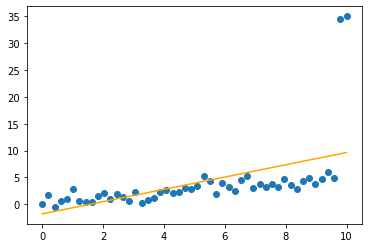

In [10]:
np.random.RandomState(seed=42)

N = 50

X = np.linspace(0, 10, N)
y = 0.5*X + np.random.randn(N)

y[-1] += 30
y[-2] += 30

model = LinearRegression(fit_intercept=True)
model.fit(X[:, np.newaxis], y)

X_plot = X
y_plot = model.predict(X_plot[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_plot, y_plot, c='orange');

The outliers have dragged our regression line off of the cluster. One way to address this is to add an additional, weighted term to the [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) equation that we used to calculate our regression line. Tuning this weight parameter for this additional term will help our regression put less emphasis on the outlying points and greater emphasis on the well-clustered points. The specific technique we'll use for this is called [ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) (also referred to as L2 regularization, which is how you will see it in Azure machine learning).

Let's try this again using ridge regression.

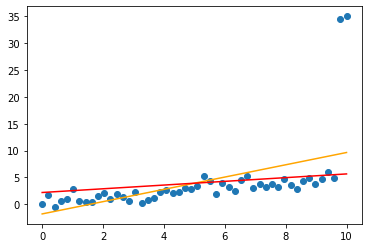

In [18]:
l2_model = Ridge(alpha=1000, fit_intercept=True)
l2_model.fit(X[:, np.newaxis], y)

X_plot2 = X
y_plot2 = l2_model.predict(X[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_plot, y_plot, c='orange')
plt.plot(X_plot2, y_plot2, c='red');

Ridge regression brought the regression line much closer to what we would expect a well-fitting regression to look like. 

> **Exercise**
>
> Rerun the code cell above with different values for the `alpha` parameter in the `Ridge()` function to see how it affects the slope of the red regression line.

Now let's see ridge regression in action in our experiment in Azure ML Studio.

1. Delete the **Cross Validate Model** module.

2. From the left pane, drag new **Train Model** and **Score Model** modules onto the canvas under the **Linear Regression** module.

3. Connect the **Linear Regression** output to the upper-left receptor in the **Train Model** module, and connect the lower-left output of the **Split Data** module to the upper-right receptor in the **Train Model** module.

4. Connect **Train Model** to the upper-left receptor in the **Score Model** module, and connect the lower-right output in the **Split Data** module to the upper-right receptor in the **Score Model** module.

5. Connect **Score Model** to the upper-right receptor in the **Evaluate Model** module.

6. Click the **Train Model** module and select the **`lifeExpF`** column in the module's **Properties** pane.

7. Click the **Linear Regression** module and enter **`42`** for the random seed. In the **L2 regularization weight** field, enter **`0.1`**.

    <img align="center" style="padding-right:10px;" src="Images/110.png" border="5">
 
8. Run the experiment. When all modules have finished running, view the evaluation report.
 
> **Exercise**
>
> Change the L2 regularization weight on both **Linear Regression** modules to different numbers (such as `0.2` and `0.01`), and compare the new $R^2$ scores to these current ones.

> **Question**
>
> What does this tell you about tuning your models?

## Publishing a web service

After a model has been fitted and is ready for use, it needs to be accessible. Azure ML Studio provides tools to help automate the process of turning a model into a web service.

1. Delete the **Linear Regression**, **Train Model**, and **Score Model** modules that you added to the experiment in subsection above.

2. After you have removed those modules, run the experiment once more. (This fits the model for the web service.)

3. On the bottom of the screen, click **SET UP WEB SERVICE > Predictive Web Service [Recommended]**.

    <img align="center" style="padding-right:10px;" src="Images/115.png" border="5">
 
4. Azure ML Studio will now prune out the modules that are not needed for the predictive web service and will add the **Web service input** and **Web service output** modules. Connect the **Web service input** module to the **Score Model** module.

5. From the left column, drag a **Select Columns in Dataset** module and place it between the **Score Model** and **Web service output** modules. Connect the modules together in this order: **Score Model -> Select Columns in Dataset -> Web service output**.

    <img align="center" style="padding-right:10px;" src="Images/120.png" border="5">

6. In the **Select Columns in Dataset** module between the **Score Model** and **Web service output** modules, select the column **Scored Labels**.
 
7. At the bottom of the window, click **RUN**.

8. After the service has completed running, click **DEPLOY WEB SERVICE** at the bottom of the window.

    <img align="center" style="padding-right:10px;" src="Images/125.png" border="5">
 
9. Azure ML Studio will automatically open the predictive experiment dashboard on the **Web services** tab. Under **TEST** in the **REQUEST/RESPONSE** row, click **Test**.

    <img align="center" style="padding-right:10px;" src="Images/131.png" border="5">
 
10. In the **Enter data to predict** window, enter data values that correspond to the columns in the dataset:
   - **REGION** = africa
   - **GROUP** = Africa
   - **FERTILITY** = 3.52
   - **LIFEEXPF** = [Because this is the column to be predicted, it does not matter what you enter here.]
   - **PCTURBAN** = 44
   - **LOG10(PPGDP)** = 3.8
 
    Azure ML Studio returns `'Simple Linear Regression [Predictive Exp.]' test returned ["47.5193162607584"]...`
  
> **Exercise**
>
> Now try different values in the test window and see the predictions that come back.

> **Takeaway**
>
> Web-based ML services like Azure ML Studio can speed up ML development and deployment. In particular, the drag-and-drop nature of such tools can make experimenting with different ML algorithms and settings easier. Automated tools can make deploying ML models as a web service -- a vital process in production environments -- much easier.

## Accessing the web service outside of Azure ML Studio

Let’s see what the experience accessing the web service you have created outside of Azure ML Studio can be like.

> **Exercise**
>
> Run `Sec3-2-LinRegression.py` from the command-line interface on your local computer and enter the values of your choice. 
>
> 1.	To access the **`URL`** for your web service, on the Azure ML Studio web service dashboard, click **REQUEST/RESPONSE**.
>        <img align="center" style="padding-right:10px;" src="Images/140.png" border="5">
>	 
>    On the **Request Response API Documentation** page for your web service, copy the **Request URI** for the **`POST`** method for your web service.
>        <img align="center" style="padding-right:10px;" src="Images/145.png" border="5">
> 
> 2.	Copy the **`API key`** from your web service’s dashboard in Azure ML Studio.
>        <img align="center" style="padding-right:10px;" src="Images/150.png" border="5">
>	 
> 3.	Valid inputs for the different dependent variables for your web service include:
>    - **region:** `Africa`, `Asia`, `Caribbean`, `Europe`, `Latin Amer`, `North America`, `NorthAtlantic`, and `Oceania`
>    - **group:** `africa`, `oecd`, and `other`
>    - **fertility:** Decimal values between `1` and `7` 
>    - **gdp:** Decimal values greater than `0` (though the largest value in the model is 105095)
>    - **pctUrban:** Integer values between `0` and `100`

> **Takeaway**
>
> Once your ML model is published as a web service, it can be accessed from anywhere on the internet and used in a variety of ways.
